
First scores are made from gotten variables (by 0.06176042556762695 secs, about 6.176042556762695e-06 for each creature)

Best score before optimization: 10000000000.012184
                                                                                                                                                                                                        
 The best found solution:
 [0.84975985 0.15023026]

 Objective function:
 4.877840105189518

 Used generations: 1500
 Used time: 213 seconds


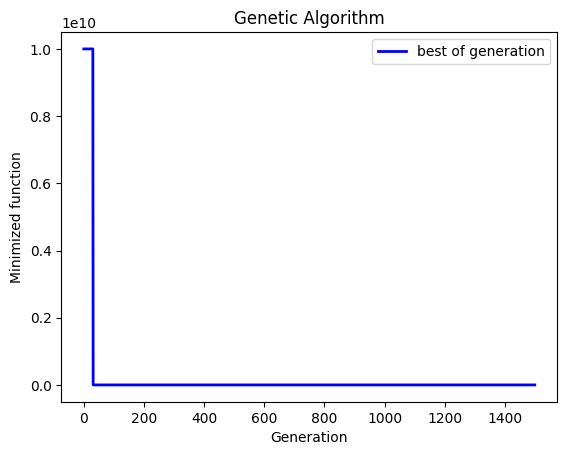

In [33]:
import numpy as np
from geneticalgorithm2 import geneticalgorithm2 as ga
from geneticalgorithm2 import Generation

expected_returns = np.array([1.08, 1.75])
covariance_matrix = np.array([
    [6.32**2,0.37*9.73*6.23],
    [0.37*9.73*6.23,9.73**2]
])

q=1
def f(w):   
    if abs(np.sum(w)-1) > 10**-5:
        return 10**10+np.linalg.norm(w-1)
    return np.sqrt(w.T@covariance_matrix@w)-q*expected_returns.T@w

dim = 2
    
varbound = [(-1,1)]*dim


model = ga(function=f, 
           dimension=dim, 
           variable_type='real', 
           variable_boundaries=varbound,
           algorithm_parameters = {'max_num_iteration': 1500,
                   'population_size': 10000,
                   'mutation_probability': 0.5,
                   'elit_ratio': 0.1,
                   'parents_portion': 0.3,
                   'selection_type': 'tournament',
                   'crossover_type':'shuffle',
                   'max_iteration_without_improv':None})

# start generation
samples = np.random.normal(0, 1, (10000, dim))


result = model.run(
    no_plot = True, 
    start_generation=Generation(variables = samples, scores = None), 
    studEA=True
)

In [34]:
result

GAResult(last_generation=Generation(variables=array([[ 0.84975985,  0.15023026],
       [ 0.84975985,  0.15023026],
       [ 0.84975985,  0.15023026],
       ...,
       [-0.97819157, -0.93143564],
       [-0.94948216, -0.99823151],
       [-0.97263581, -0.9994077 ]]), scores=array([4.87784011e+00, 4.87784011e+00, 4.87784011e+00, ...,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10])))

In [36]:
model.report

[10000000000.012184,
 10000000000.004522,
 10000000000.001165,
 10000000000.000269,
 10000000000.000086,
 10000000000.00001,
 10000000000.000002,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 10000000000.0,
 5.239989742279523,
 5.239989741541964,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 5.239989739901441,
 4.9007910262834855,
 4.9007910262834855,
 4.9007910262834855,
 4.9007910262834855,
 4.9007910262834855,
 4.9007910262834855,
 4.9007910262834855,
 4.9007910262834855,
 4.9007910262834855,
 

In [37]:
result.variable

array([0.84975985, 0.15023026])

In [42]:
result.variable

array([0.84975985, 0.15023026])

In [38]:
result.score

4.877840105189518

In [39]:
result.last_generation

Generation(variables=array([[ 0.84975985,  0.15023026],
       [ 0.84975985,  0.15023026],
       [ 0.84975985,  0.15023026],
       ...,
       [-0.97819157, -0.93143564],
       [-0.94948216, -0.99823151],
       [-0.97263581, -0.9994077 ]]), scores=array([4.87784011e+00, 4.87784011e+00, 4.87784011e+00, ...,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10]))

In [46]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

np.dot(softmax(np.array([[1,2,3],[4,5,6]])[:,-1]),np.array([[1,2,3],[4,5,6]])[:,-1])

5.8577223804673